In [1]:
#Import my dependencies
import os
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
from pandas import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 12, 7
from subprocess import check_output
from pandas.plotting import lag_plot
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#importing the dataset
df = pd.read_csv('/Users/markjuvert/Desktop/ARIMA/Limestone_ev.csv')
df.head()

,Date,Limestone,Cement,Gold,Interest Rates,Coal,Energy
0,1/2/14,5.00,11.31,18.309999,24.940001,8.40,22.200001
1,1/3/14,4.85,11.26,18.150000,25.100000,8.18,22.680000
2,1/6/14,4.60,11.31,18.350000,25.139999,8.23,23.330000
3,1/7/14,4.95,11.45,18.270000,25.129999,8.27,23.889999
4,1/8/14,5.10,11.46,17.959999,25.070000,8.08,23.770000


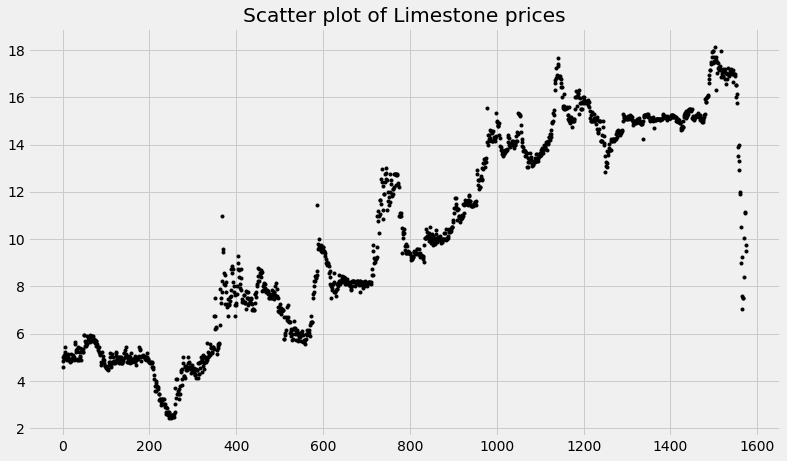

In [3]:
#Distribution of the data
df_limestone = df['Limestone']
df_limestone.plot(style='k.')
plt.title('Scatter plot of Limestone prices')
plt.show()

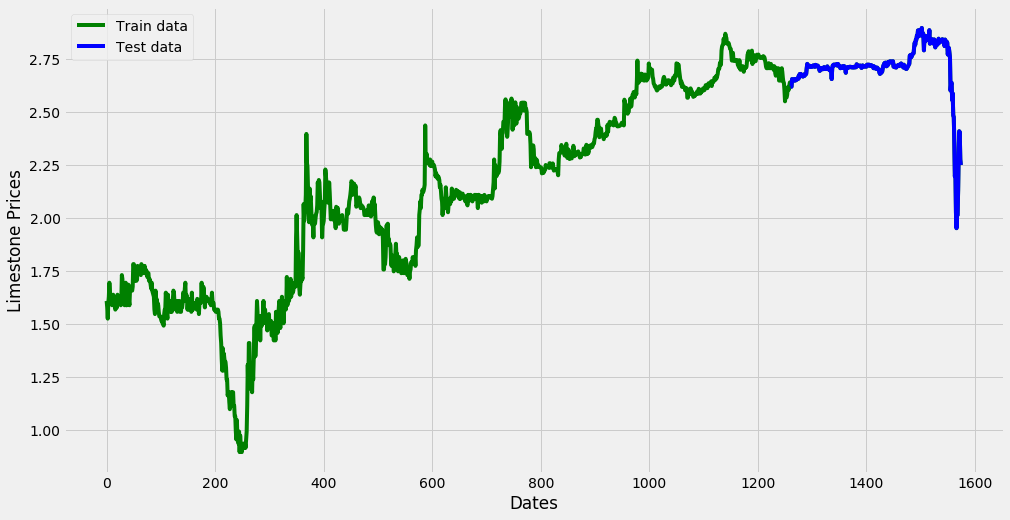

In [4]:
#split data into train and training set
df_log = np.log(df_limestone)
train_data, test_data = df_log[3:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
plt.figure(figsize=(15,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Limestone Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [5]:
#Finding the best set of values of p, d, and q
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-4411.636, BIC=-4401.364, Time=0.328 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-4466.689, BIC=-4451.282, Time=0.212 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-4477.426, BIC=-4462.019, Time=0.469 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-4413.139, BIC=-4408.003, Time=0.197 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-4477.384, BIC=-4456.841, Time=0.706 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=-4477.995, BIC=-4457.452, Time=0.416 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=-4476.408, BIC=-4450.730, Time=0.211 seconds
Fit ARIMA(0,1,3)x(0,0,0,0) [intercept=True]; AIC=-4477.362, BIC=-4451.684, Time=0.478 seconds
Fit ARIMA(1,1,3)x(0,0,0,0) [intercept=True]; AIC=-4475.479, BIC=-4444.665, Time=1.737 seconds
Total fit time: 4.791 seconds
                               SARIMAX Results                                
D

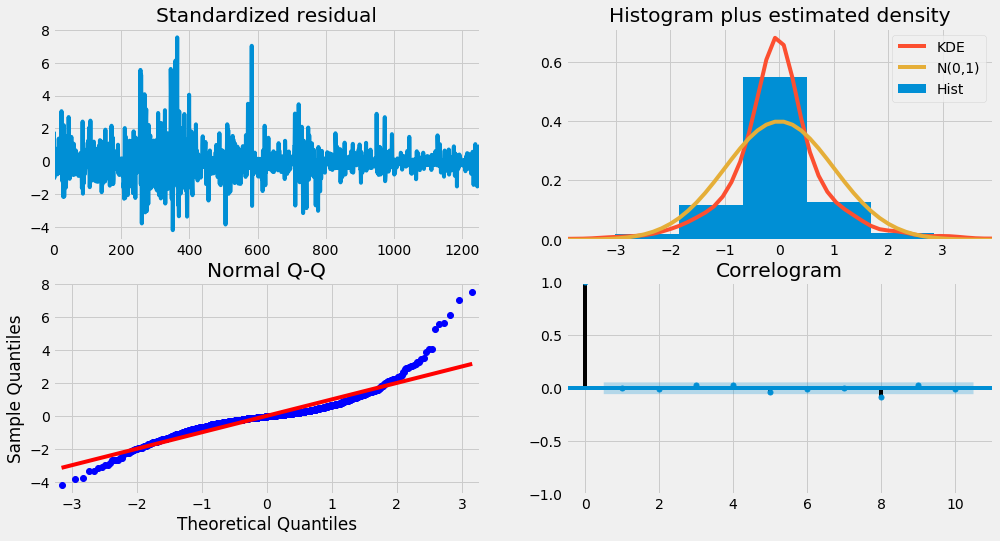

In [6]:
#Diagnosis
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [7]:
model = ARIMA(train_data, order=(0, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Limestone   No. Observations:                 1256
Model:                 ARIMA(0, 1, 2)   Log Likelihood                2242.998
Method:                       css-mle   S.D. of innovations              0.041
Date:                Wed, 01 Jul 2020   AIC                          -4477.995
Time:                        18:30:12   BIC                          -4457.452
Sample:                             1   HQIC                         -4470.274
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0008      0.001      0.986      0.324      -0.001       0.002
ma.L1.D.Limestone    -0.2327      0.028     -8.181      0.000      -0.288      -0.177
ma.L2.D.Limestone    -0.